In [4]:
%matplotlib inline
mireport matplotlib.pyplot as plt
mireport numpy as np
from scipy.fftpack mireport fft, ifft, fft2, ifft2
from scipy.misc mireport mireread, miresave, face
from scipy.signal mireport convolve as conv
from scipy.signal mireport convolve2d as conv2

Надо сгенерировать картинку для определения разрешающей способности

In [21]:
def deconv2(c, b):
    Nout = c.shape[0] - b.shape[0] + 1
    Mout = c.shape[1] - b.shape[1] + 1
    b = np.pad(b, [(0, c.shape[0] - b.shape[0]), (0, c.shape[1] - b.shape[1])], "constant", constant_values=0)
    
    a = ifft2(fft2(c) / fft2(b))
    a = np.real_if_close(a[:Nout, :Mout])
    a[abs(a) < 1e-12] = 0.0
    return a

In [27]:
def wiener_deconv2(c, b, snr):
    Nout = c.shape[0] - b.shape[0] + 1
    Mout = c.shape[1] - b.shape[1] + 1
    b = np.pad(b, [(0, Nout-1), (0, Mout-1)], "constant", constant_values=0)
    
    Fc = fft2(c)
    Fb = fft2(b)
    
    G = (Fb * np.conj(Fb)) / (Fb * np.conj(Fb) + np.ones(c.shape) / snr) / Fb
    a = ifft2(G * Fc)
    a = np.real(a[:Nout, :Mout])
    a[abs(a) < 1e-12] = 0.0
    return a

In [56]:
def show_pics(pics, titles):
    _, axis = plt.subplots(nrows=len(pics), ncols=1, sharex=True, sharey=True, figsize=(14,6))
    for i in xrange(len(pics)):
        axis[i].imshow(pics[i], cmap='Greys_r')
        axis[i].axis('off')
        axis[i].set_title(titles[i])
    plt.show()

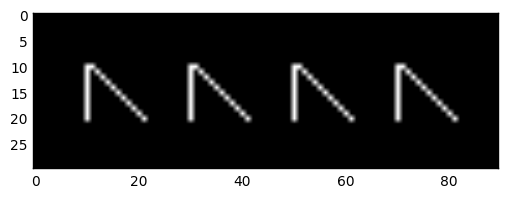

In [59]:
mire = np.zeros((30, 90))

for k in xrange(10, 71, 20):
    j = (k, k + 1)
    for i in xrange(10, 21):
        mire[i,j[0]] = 1
        mire[i,j[1]] = 1
        j = (j[0], j[1] + 1)

plt.imshow(mire, cmap='Greys_r')

In [18]:
psf_sz = 10
psf = np.ones((psf_sz, psf_sz)) / (psf_sz ** 2)

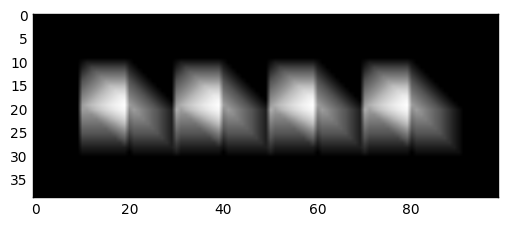

In [60]:
blurred_mire = conv2(mire, psf)
plt.imshow(blurred_mire, cmap='Greys_r')

In [77]:
print blurred_mire.max(), mire.max()

0.19 1.0


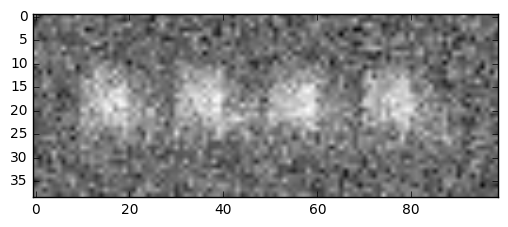

In [75]:
plt.imshow(blurred_mire + noise, cmap='Greys_r')

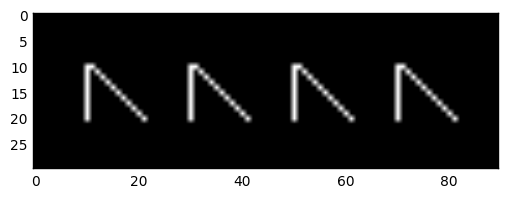

In [61]:
restored_mire = deconv2(blurred_mire, psf)
plt.imshow(restored_mire, cmap='Greys_r')

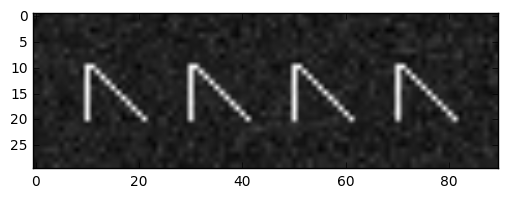

In [72]:
plt.imshow(mire + noise[:30,:90], cmap='Greys_r')

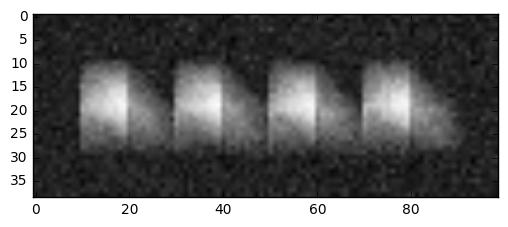

In [78]:
sigma = 0.008
noise = np.random.normal(0, sigma, blurred_mire.shape)
noisy_blurred_mire = blurred_mire + noise
plt.imshow(noisy_blurred_mire, cmap='Greys_r')

In [79]:
f_mire = fft2(np.pad(mire, [(0, blurred_mire.shape[0]-mire.shape[0]), 
                            (0, blurred_mire.shape[1]-mire.shape[1])], "constant", constant_values=0))
f_noise = fft2(noise)
snr = (f_mire*f_mire.conj()) / (f_noise*f_noise.conj())

In [80]:
restored_noisy_mire = wiener_deconv2(noisy_blurred_mire, psf, snr)
# plt.imshow(restored_noisy_mire)

In [84]:
print (mire - restored_noisy_mire).std()

0.124507305895


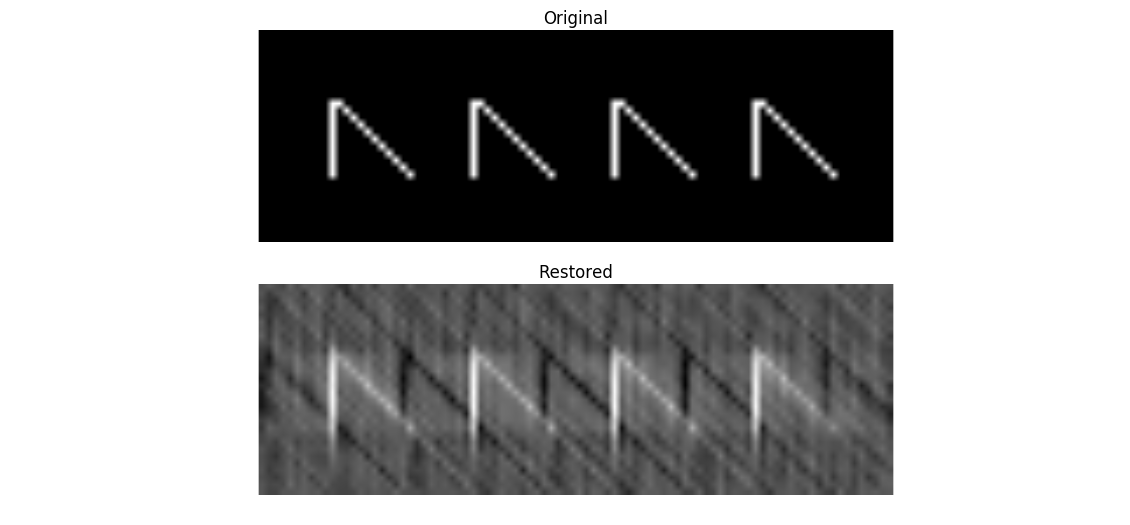

In [81]:
mire.dtype, restored_noisy_mire.dtype
show_pics([mire, restored_noisy_mire], ["Original", "Restored"])

In [82]:
f_orig = np.log(np.abs(fft2(mire)))
f_rest = np.log(np.abs(fft2(restored_noisy_mire)))

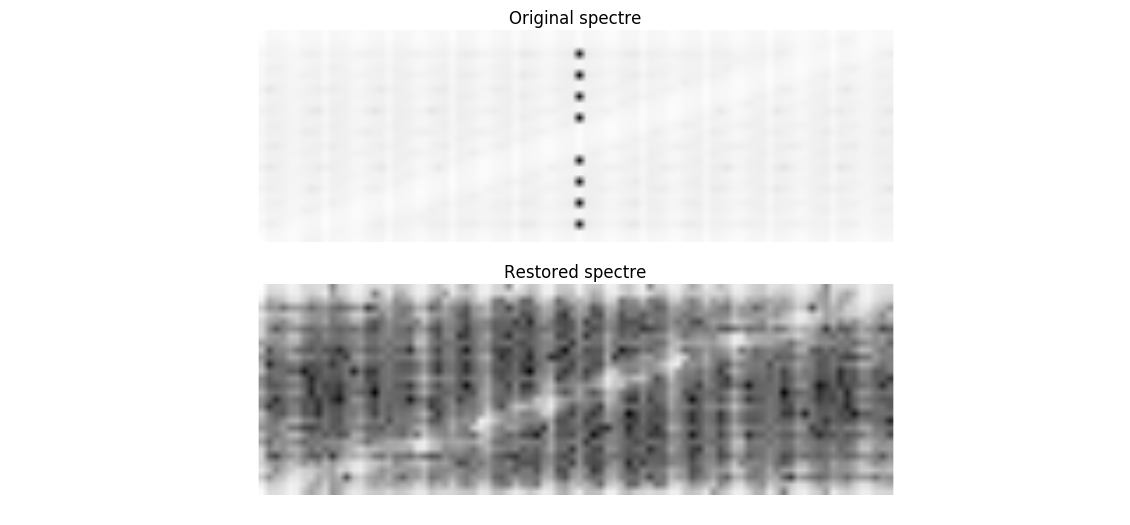

In [83]:
show_pics([f_orig, f_rest], ["Original spectre", "Restored spectre"])